In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_classes = 10
input_shape = (28, 28, 1)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [4]:
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 15s 35ms/step - loss: 0.3535 - accuracy: 0.8930 - val_loss: 0.0868 - val_accuracy: 0.9760
Epoch 2/15
422/422 [==============================] - 15s 35ms/step - loss: 0.1112 - accuracy: 0.9658 - val_loss: 0.0596 - val_accuracy: 0.9818
Epoch 3/15
422/422 [==============================] - 15s 35ms/step - loss: 0.0843 - accuracy: 0.9735 - val_loss: 0.0499 - val_accuracy: 0.9848
Epoch 4/15
422/422 [==============================] - 15s 35ms/step - loss: 0.0715 - accuracy: 0.9776 - val_loss: 0.0423 - val_accuracy: 0.9873
Epoch 5/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0595 - accuracy: 0.9813 - val_loss: 0.0393 - val_accuracy: 0.9890
Epoch 6/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0555 - accuracy: 0.9826 - val_loss: 0.0361 - val_accuracy: 0.9902
Epoch 7/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0516 - accuracy: 0.9837 - val_loss: 0.0325 - val_accuracy:

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02431561052799225
Test accuracy: 0.991599977016449


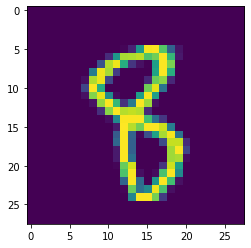

In [6]:
plt.imshow(x_train[726])

In [7]:
np.argmax(model.predict(np.array([x_train[726]])))

8

In [8]:
model.save('mnist.keras')